In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("train.csv")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


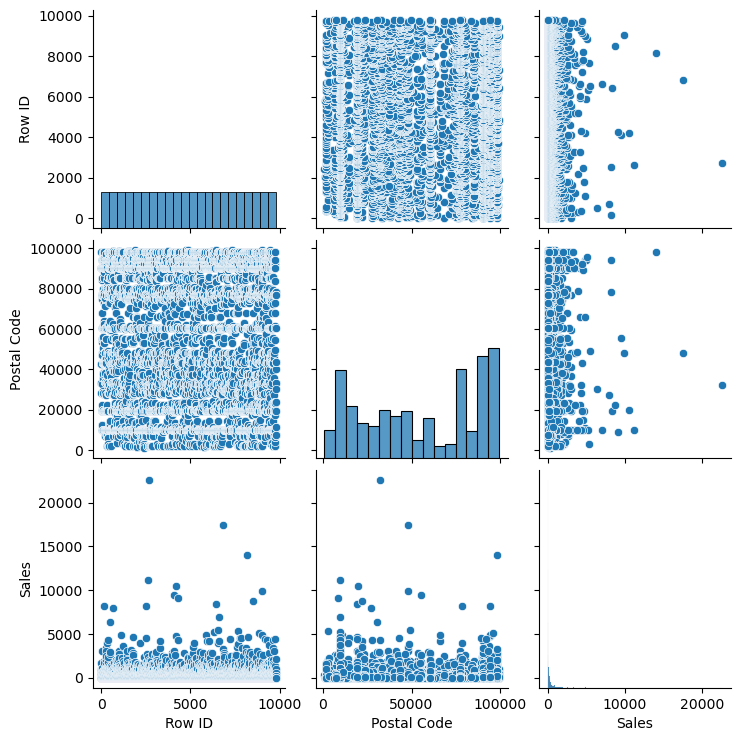

In [3]:
sbn.pairplot(data)

In [4]:
data=data.drop(["Row ID","Order ID","Customer ID","Product ID"],axis=1)
data

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [5]:
data.isnull().count()

Order Date       9800
Ship Date        9800
Ship Mode        9800
Customer Name    9800
Segment          9800
Country          9800
City             9800
State            9800
Postal Code      9800
Region           9800
Category         9800
Sub-Category     9800
Product Name     9800
Sales            9800
dtype: int64

In [6]:
data.describe()

,Postal Code,Sales
count,9789.000000,9800.000000
mean,55273.322403,230.769059
std,32041.223413,626.651875
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,58103.000000,54.490000
75%,90008.000000,210.605000
max,99301.000000,22638.480000


In [9]:
data["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [10]:
data ["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [11]:
data["Country"].unique()

array(['United States'], dtype=object)

In [17]:
data["City"].nunique()

529

In [19]:
data["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [14]:
data["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [15]:
data["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [16]:
data["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [20]:
data.groupby("Category")["Sales"].sum().sort_values(ascending=False)

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

<Axes: xlabel='Sub-Category', ylabel='Sales'>

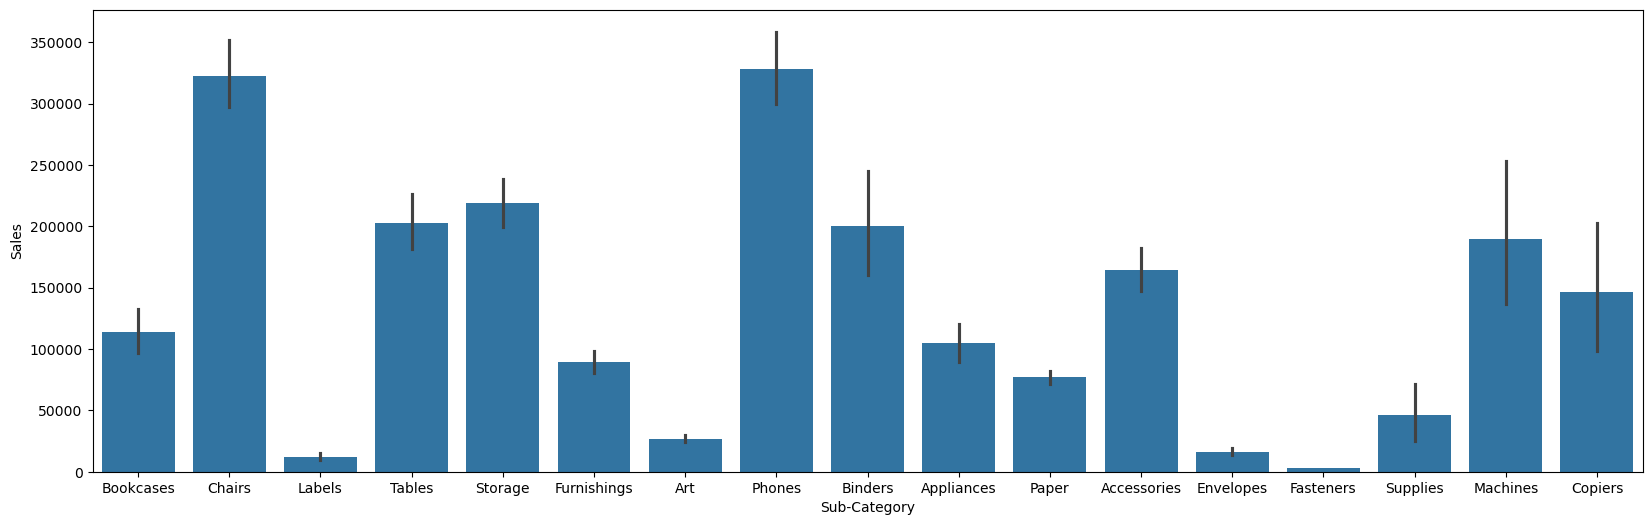

In [31]:
plt.figure(figsize=(20,6))
sbn.barplot(data=data, x='Sub-Category', y='Sales', estimator=sum)

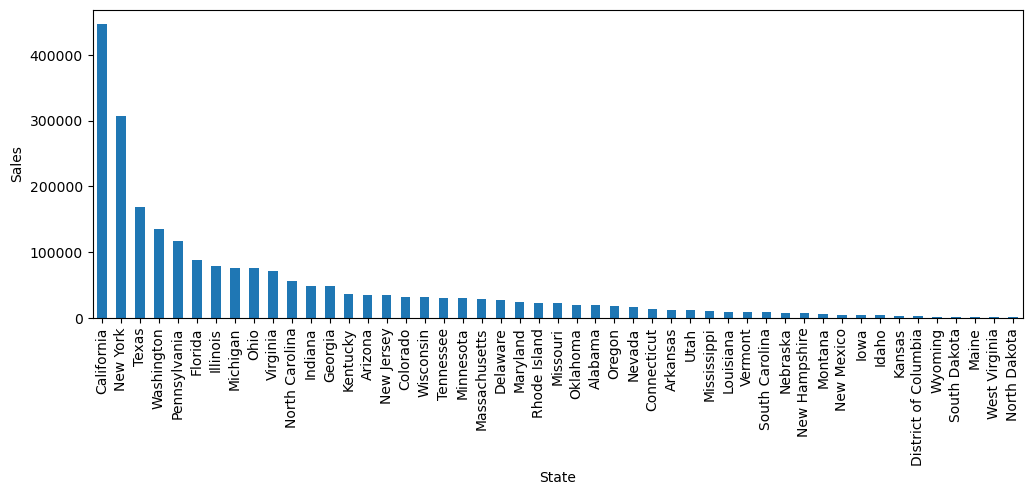

In [36]:
data.groupby("State")["Sales"].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Sales'>

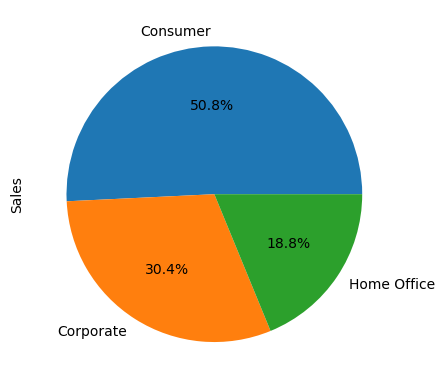

In [44]:
data.groupby('Segment')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%')

In [46]:
data=data.sort_values("Order Date")
data.set_index("Order Date",inplace=True)

C:\Users\220201304\AppData\Local\Temp\ipykernel_29560\2885822234.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data["Sales"].resample("M").sum().plot(title="Mon")#M aaylık olduğunu belirtiyoruz


<Axes: title={'center': 'Mon'}, xlabel='Order Date'>

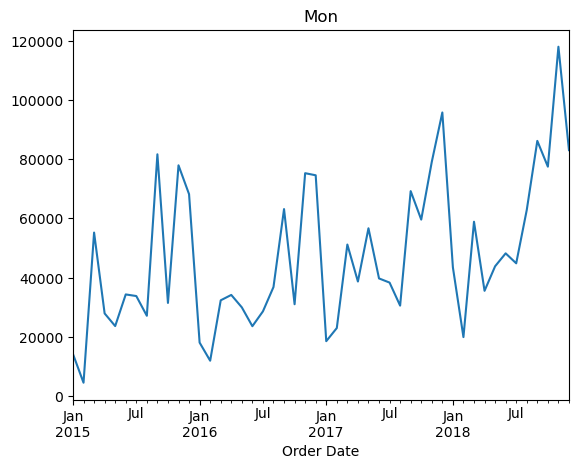

In [49]:
data["Sales"].resample("M").sum().plot(title="Mon")#M aaylık olduğunu belirtiyoruz
#D günlük W haftalaık Y yıllık

<Axes: ylabel='City'>

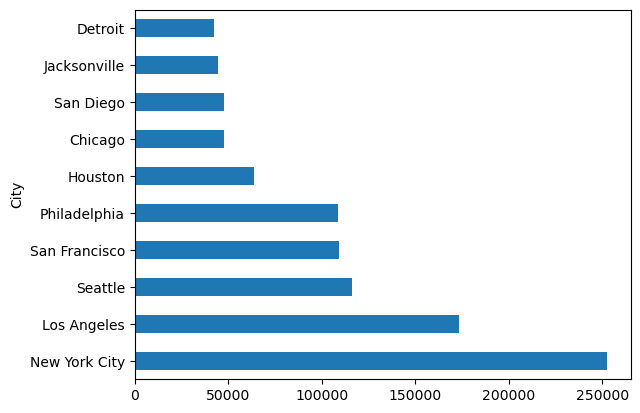

In [51]:
data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

<Axes: xlabel='Segment', ylabel='Sales'>

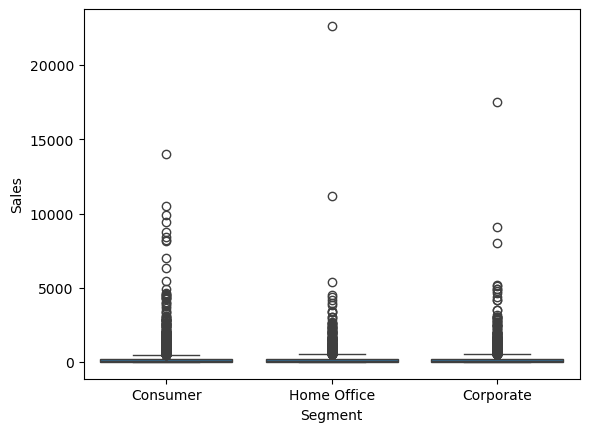

In [54]:
sbn.boxplot(x='Segment', y='Sales', data=data)

<Axes: xlabel='Category', ylabel='Sales'>

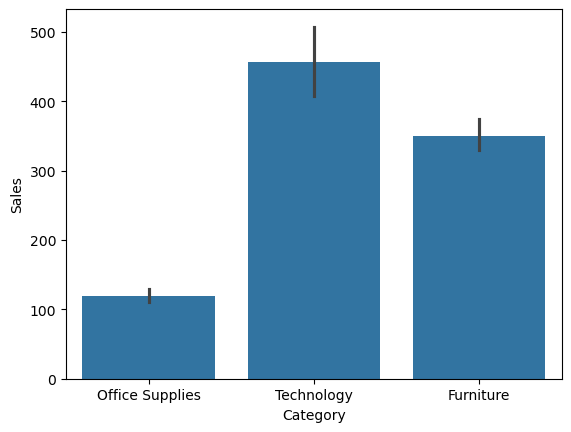

In [55]:
sbn.barplot(x='Category', y='Sales', data=data)

<Axes: xlabel='Sub-Category'>

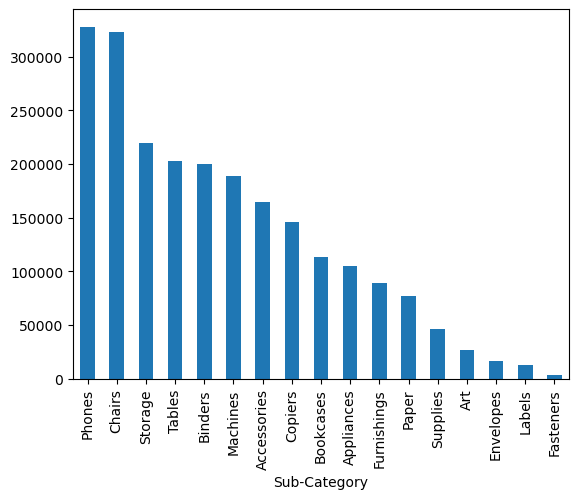

In [56]:
data.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Region', ylabel='Sales'>

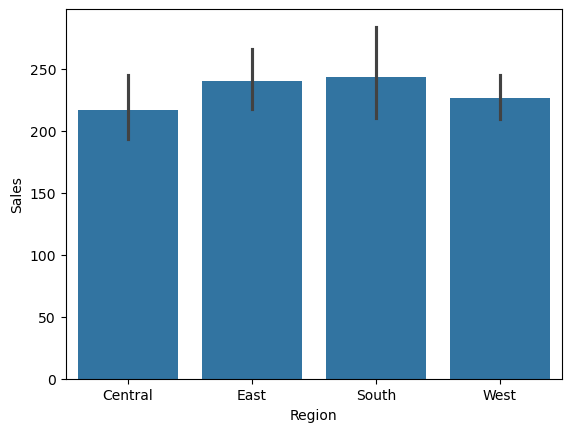

In [58]:
sbn.barplot(x='Region', y='Sales', data=data)